## Analyze A/B Test Results

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [147]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [148]:
#importing the data
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [149]:
#checking the data types
df.dtypes

user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
dtype: object

In [150]:
#checking if the data has any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


b. Use the cell below to find the number of rows in the dataset.

In [151]:
print('The number of rows in the dataset is',len(df))

The number of rows in the dataset is 294478


c. The number of unique users in the dataset.

In [152]:
print('The number of unique users are',df['user_id'].nunique())

The number of unique users are 290584


d. The proportion of users converted.

In [153]:
print('The proportion of users converted',df['converted'].mean())

The proportion of users converted 0.119659193556


e. The number of times the `new_page` and `treatment` don't match.

In [154]:
print('The number of Treatment users landing in old page and control users landing in old page is',len(df[(df['group']=='treatment')^(df['landing_page']=='new_page')]))

The number of Treatment users landing in old page and control users landing in old page is 3893


f. Do any of the rows have missing values?

In [155]:
df.isnull().sum() #checking for null values

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [156]:
#taking out only the matched values between control and treatment user groups
df_treat=df[df['group']=='treatment']
df_cont=df[df['group']=='control']

df_new_treat = df_treat[df_treat['landing_page'] == 'new_page']
df_old_cont=df_cont[df_cont['landing_page'] == 'old_page']

df2=pd.concat([df_new_treat,df_old_cont],ignore_index=True)
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [157]:
# Double Check all of the correct rows were removed - this should be 0. This is done to have meaninful data without any mismatch
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [158]:
print('The number of unique users are', df2['user_id'].nunique()) 

The number of unique users are 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [159]:
df2['user_id'][df2['user_id'].duplicated()] # taking out duplicated user_ID

1404    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [160]:
df2[df2.duplicated(['user_id'],keep=False)] #information on duplicated rows

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [161]:
# this is done to remove the duplicated user ID from the dataset
df2['user_id'].drop_duplicates(inplace=True)
sum(df2['user_id'].duplicated())

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [162]:
print('Probability of an individual converting regardless of the page',df2['converted'].mean())

Probability of an individual converting regardless of the page 0.119596675671


b. Given that an individual was in the `control` group, what is the probability they converted?

In [163]:
print('The probability of control group getting converted-',len(df2[(df2['group']=='control')&(df2['converted']==1)])/len(df2[df2['group']=='control']))

The probability of control group getting converted- 0.1203863045004612


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [164]:
print('The probability of Treatment group getting converted-',len(df2[(df2['group']=='treatment')&(df2['converted']==1)])/len(df2[df2['group']=='treatment']))

The probability of Treatment group getting converted- 0.11880724790277405


d. What is the probability that an individual received the new page?

In [165]:
print('Probability that an individual received the new page',len(df2[(df2['landing_page']=='new_page')])/len(df2))
print('Probability that an individual received the old page',len(df2[(df2['landing_page']=='old_page')])/len(df2))

Probability that an individual received the new page 0.5000636646764286
Probability that an individual received the old page 0.4999363353235714


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

<b> Summarizing the steps:</b>
1. Removed the mismatched value rows.
2. Removed the duplicated rows so as to keep unique users for the assessment.
3. Checked the probability of getting converted given that the user belonged to control group.
4. Checked the probability of getting converted given that the user belonged to experiment group.
5. Checked the probabilities of an individual getting new page and old page respectively.

<b> Inference </b>
<p> Given that there is equal amount of proportion between old_page and new_page visitors (50%), the probablity of getting  converted for old page user is 12.03% which is very slightly better  as probability of old page user getting converted is 11.08%. Hence it is difficult to say that conversion rate would be better for one page than the other from this probability test, taking into account duration of the test and change aversion. </p>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0=p_{new}-p_{old}<=0 $$
$$H_a=p_{new}-p_{old}>0 $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [166]:
#conversion rate for p_new null
p_new = df2['converted'].mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [167]:
#conversion rate for p_old
p_old= df2['converted'].mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [168]:
# no of individuals under treatment group
n_new=len(df2[df2['group']=='treatment'])
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [169]:
# no of individuals under control group

n_old=len(df2[df2['group']=='control'])
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [170]:
#simulating null for new page users
new_page_converted=np.random.choice([0,1],size=n_new,p=[p_new,(1-p_new)]).mean()
new_page_converted

0.88096565297878349

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [171]:
#simulating null for new page users

old_page_converted=(np.random.choice([0,1],size=n_old,p=[p_old,(1-p_old)])).mean()
old_page_converted

0.88164434103831379

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [172]:
# difference between new page and old page users
diff=new_page_converted-old_page_converted
diff

-0.00067868805953030797

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [173]:
new_page_converted = np.random.binomial(n_new, p_new, 10000)/n_new
old_page_converted = np.random.binomial(n_old, p_old, 10000)/n_old
p_diff= new_page_converted - old_page_converted

i. Plot a histogram of the **p_diffs**.

Text(0,0.5,'Frequency')

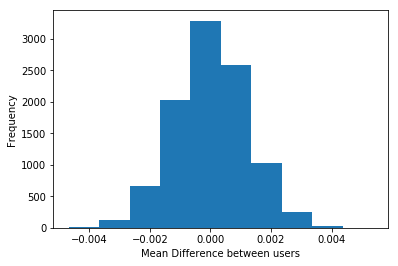

In [174]:
p_diffs=np.array(p_diff)
plt.hist(p_diff)
plt.xlabel('Mean Difference between users')
plt.ylabel('Frequency')

<b> From the above plot it can be noted that this followed CLT, that as the number of sample increased the distribution 
    would follow a normal distribution. </b>

In [175]:
# mean of null values 
np.mean(p_diffs)

1.7554384918901167e-05

In [176]:
# calculating the mean from original sample 
obs_mean=(df2['converted'][(df2['group']=='treatment')]).mean() - (df2['converted'][(df2['group']=='control')]).mean()
obs_mean


-0.0015790565976871451

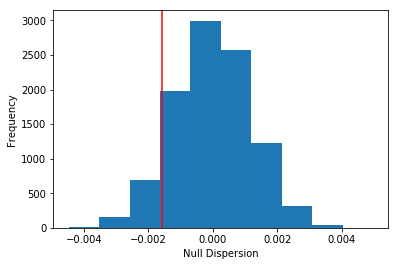

In [177]:
#plotting histogram of normal at zero mean with std deviation obtained from null
std_null=np.std(p_diffs)
null_vals=np.random.normal(0,std_null,10000)
plt.hist(null_vals)
plt.xlabel('Null Dispersion')
plt.ylabel('Frequency')
plt.axvline(obs_mean,color='r')

<b> The above plot shows the observed comes under the simulated null </b>

j. What proportion of the p_diffs are greater than the actual difference observed in ab_data.csv?

In [178]:
# proportion of p_diff greater than observed mean/actual difference
(null_vals>obs_mean).mean()

0.90529999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<b>Summarizing the steps:<b>
    1. Simulated the p_new and p_old values with np.random.choice.
    2. Obtained the mean difference between p_new and p_old.
    3. Simulated using bootstrapping for 10000 iterations to check on the consistency.
    4. Plotted the null valuesalong with Observed mean from the sample to check if the mean has been simulated in the null.
    5. Checked for pvalue.
    
<b> Inference </b>
<ol>
  <li>The Observed mean falls within the simulated null, showing the mean has come from this null. </li>
  <li>The p-value of 0.907 is greater than the type-1 error threshold of 0.05 which suggests that the null hypothesis cannot be rejected ($p_{new}-p_{old} <=0 $), Or in other words the old page is statistically signicant in terms of conversion than the new page so the company can stick on to the old page design. </li>
    
    
    

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [179]:
import statsmodels.api as sm

convert_old = sum(df2['converted'][df2['group']=='control'])
convert_new = sum(df2['converted'][df2['group']=='treatment'])
n_old = len(df2[df2['group']=='control'])
n_new = len(df2[df2['group']=='treatment'])

In [180]:
convert_old,convert_new,n_old,n_new

(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [181]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31160753391 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<b> Inference </b>
<p> Yes it matches with the p-value of 0.905 obtained from j and k ie much greater than 0.05 type-1 error threshold value, suggesting that old design was better than the new design </p>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<b> Logistic Regression. </b>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [182]:
#adding the intercepts along with the dummies
df2['intercept']=1
df2[['control','treatment']]=pd.get_dummies(df2['group'])
df2[['new_page','old_page']]=pd.get_dummies(df2['landing_page'])

df2.tail()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page
290580,718310,2017-01-21 22:44:20.378320,control,old_page,0,1,1,0,0,1
290581,751197,2017-01-03 22:28:38.630509,control,old_page,0,1,1,0,0,1
290582,945152,2017-01-12 00:51:57.078372,control,old_page,0,1,1,0,0,1
290583,734608,2017-01-22 11:45:03.439544,control,old_page,0,1,1,0,0,1
290584,697314,2017-01-15 01:20:28.957438,control,old_page,0,1,1,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [183]:
# modeling with the required paraemeters
lm=sm.Logit(df2['converted'],df2[['intercept','treatment']])


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [185]:
#fitting the linear model
r=lm.fit()
r.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-28 15:10 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

In [186]:
# this to find the duration of the test
df2['timestamp']=pd.to_datetime(df2['timestamp'])
max(df2['timestamp'])-min(df2['timestamp']) 

Timedelta('21 days 23:59:49.081927')

In [187]:
#finding the exponents of the parameters since this a Logistic regression and taking the reciprocal as the 
#parameters were negative to give a clear information 
1/np.exp(r.params)

intercept    7.306593
treatment    1.015110
dtype: float64

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<b> Inference </b>
$$ h_0=p_{new}-p_{old}=0$$
    $$ h_1=p_{new}-p_{old}<>0$$

1. Here the null and Alternate hypothesis is defined differently that there no difference between the p_old and P_new for the null and vice versa for the alternate, meaning that this is a two-sided hypothesis. 
2. A p-value of 0.19 (greater than 0.05) suggest that is statistically insignificant and that we fail to reject the null hypothesis and the old page design is slightly better. This gives us a conclusion that the regression has given a similar intrepretation to the A/B testing.
3. However interpreting the coefficients, for treatment users it 1.015 times less likely to get converted provided all the parameters remain constant.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<p> There will be other influencing factors that would help in estimating about the conversion </p>
<b> Sesonal Trends/offers </b><br>
If there was a paramater which would capture the information whether offers related to seasonal holidays are released or not in the pages will influence better in the estimation of conversion.<br>
<b> Product Recommendation</b><br>
As the name suggests recommendation relating individual users past purchases feature would be helpful in estimating the conversion rate this parameters has been captured.<br>
<b> Gender information </b><br>
If a parameter capturing the gender info might help in influencing the conversion. <br>
<b> Duration </b><br>
Other importanat factor is that this test was concluded in 21 days, which I feel could have been extended more to get a more detailed or fair estimation.

But having said these, there will be limitations with regression models in estimating the conversion rate as accounting all factors in the model would be difficult such as problems relating to multi-collinearity.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [188]:
#importing the countries data set and inserting the dummies
df_c=pd.read_csv('countries.csv')
df_new=df2.set_index('user_id').join(df_c.set_index('user_id'),how='inner')
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])
df_new.head()

,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country,CA,UK,US
user_id,,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,1,0,US,0,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,1,0,US,0,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1,US,0,0,1
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,1,0,US,0,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,1,0,US,0,0,1


In [191]:
#create the interaction higher order term for the Treatment page and country columns
df_new["US_page"], df_new["UK_page"] = df_new["US"] * df_new["treatment"], df_new["UK"] * df_new["treatment"]

In [193]:
df_new.head()

,timestamp,group,landing_page,converted,intercept,control,treatment,new_page,old_page,country,CA,UK,US,CA_page,UK_page,US_page
user_id,,,,,,,,,,,,,,,,
630000,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,1,0,US,0,0,1,1,0,1
630001,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,1,0,US,0,0,1,1,0,1
630002,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,1,US,0,0,1,0,0,0
630003,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,1,0,US,0,0,1,1,0,1
630004,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,1,0,US,0,0,1,1,0,1


In [199]:
#modelling and fitting with the Countries parameters
df_new['intercept'] = 1

lm = sm.Logit(df_new['converted'], df_new[['intercept', 'treatment', 'US','UK','US_page','UK_page']])
results2 = lm.fit()
results2.summary2()


Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-01-28 15:17 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
treatment     -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_page        0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<b> The model has p-values which is larger which makes them statistically insignificant for the estimation even with higher order terms</b>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [200]:
expo=np.exp(results2.params)

In [201]:
#finding the exponents of the parameters since this a Logistic regression and taking the reciprocal as the 
#parameters were negative to give a clear information 
1/expo

intercept    7.418713
treatment    1.069775
US           0.982625
UK           0.988285
US_page      0.954208
UK_page      0.924703
dtype: float64

<b> Inference</b>
<ol> 
<li> Eventhough page conversions with respect to countries have been included in the model, it can be seen that the those were statistically insignificant (>0.05) for the analysis.</li>
<li> <b> Interpreting the coefficients </b>:<br>
 <b> For treatment users </b>  it is  1.015 time less likely to get converted provided all the other parameters are left constant.<br>
 <b> For UK users </b>  it is  0.98 time more likely to get converted provided all the other parameters are left constant.<br>
 <b> For US users </b>  it is  0.99 time more likely to get converted provided all the other parameters are left constant.<br>
 <b> For US and treatment users </b>  it is  0.95 time more likely to get converted provided all the other parameters are left constant.<br>  
<b> For UK and treatment users </b>  it is  0.92 time more likely to get converted provided all the other parameters are left constant.<br>        
  
    
<li> Testing Groups with the countries perspective too (also with higher order terms) is not statiscally significant enough to be able to say that we can reject the null hypothesis, that is to say the new page has more conversion rate than the old page.Hence old page design can be retained for the website</li>
<li> Possibly more influencing factors like mentioned above can be included subjective to SME's advice can be added by the company to the analysis which could result in more accurate estimation. </li>   

<b> Conclusions from this analysis </b>
<ol> 
<li> Using the probability test, it couldn't be inferred that old page was better than new page as 
both the Probability was almost equal (12%).</li>
<li> From A/B testing using bootstrapping, it could be inferred that the old page had better conversion rate than the new page
with a p-Value of 0.905. But would be interesting to conduct the same test if the conducted duration is longer.</li>
<li> With regression analysis, statistically significance to say new page was better than the old page was lesser hence the company can retain the old page. </li>

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])